# <font color=green> Introduction:</font>

**In this Jupyter notebook I am going to analyse a Uber Dataset to find some insights. I will explore and find answer to some of the questions :**
1. How much Uber trips occurred during the timestamp in the dataset?
2. What is the median for daily and monthly total trips?
3. How is the customer segment proportion?
4. How is the hourly-trend for Uber trips?
5. What is the probability of each segments ordering an Uber for each hour?
6. What is the favorite pick-up spots for each segment?
7. How is the daily-trend for Uber trips?
8. How is the monthly-trend for Uber trips?
9. Is there any specific characteristic of each segment based on the travel distance?
10. Is there any specific characteristic of each segment based on the travel time?

## <font color= black> Importing Data: </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/f/Downloads/archive/UberDataset.csv")

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


#### The index 1155 is useless therefore droping that row

In [5]:
df.drop(index=1155, axis=0, inplace = True)

In [6]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [7]:
#Data Types of all the columns:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

The Start_Date and End_Date are of type Object 
To ease our analysis , changing it to datetime.

In [8]:
#Changing DTypes:
df['START_DATE']=pd.to_datetime(df['START_DATE'], infer_datetime_format=True, utc=True)
df['END_DATE']=pd.to_datetime(df['END_DATE'], infer_datetime_format=True, utc=True)

In [9]:
df.dtypes

START_DATE    datetime64[ns, UTC]
END_DATE      datetime64[ns, UTC]
CATEGORY                   object
START                      object
STOP                       object
MILES                     float64
PURPOSE                    object
dtype: object

### Data Cleaning :

Dropping Duplictaed Rows from the data set

In [10]:
def drop_dup(df):
    print (f'Shape before dropping the duplicates : ', df.shape)
    dup=df.duplicated().sum()
    print('No. of Duplicated Values: ',dup)
    df=df.drop_duplicates()
    print(f'Shape after Dropping the Duplicates: ',df.shape)
    return df
df=drop_dup(df)

Shape before dropping the duplicates :  (1155, 7)
No. of Duplicated Values:  1
Shape after Dropping the Duplicates:  (1154, 7)


Checking Missing Values for ecah columns:

In [11]:
df.isna().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

Only PURPOSE column have missing values. No.of missing values are : 502 

In [12]:
#checking unique values in Purpose column:
df['PURPOSE'].value_counts()

Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [13]:
#checking unique values in Category Column:
df['CATEGORY'].value_counts()

Business    1077
Personal      77
Name: CATEGORY, dtype: int64

In [14]:
#checking CATEGORY and PURPOSE columns together for unique values:
df[['CATEGORY','PURPOSE']].value_counts().sort_index(level=0, ascending = True)

CATEGORY  PURPOSE        
Business  Airport/Travel       3
          Between Offices     18
          Customer Visit     101
          Errand/Supplies    128
          Meal/Entertain     160
          Meeting            186
          Temporary Site      50
Personal  Charity ($)          1
          Commute              1
          Moving               4
dtype: int64

### Checking Inconsistent Data:

In [15]:
df.dtypes

START_DATE    datetime64[ns, UTC]
END_DATE      datetime64[ns, UTC]
CATEGORY                   object
START                      object
STOP                       object
MILES                     float64
PURPOSE                    object
dtype: object

In [16]:
#Checking Inconsistent Data Categorically:
for col in df.columns:
    if df[col].dtypes==object:
        print(df[col].value_counts())
        print(' ')

Business    1077
Personal      77
Name: CATEGORY, dtype: int64
 
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64
 
Cary                 202
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP, Length: 188, dtype: int64
 
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64
 


The columns 'PURPOSE' and 'CATEGORY' have consistent data.
However the columns 'START' and 'END' have inconsistent data. 

In [17]:
#looking into START column:
for i in df['START'].value_counts().sort_index().index:
    print(i)
    

Agnew
Almond
Apex
Arabi
Arlington
Arlington Park at Amberly
Asheville
Austin
Banner Elk
Bellevue
Berkeley
Boone
Briar Meadow
Bryson City
Burtrose
CBD
Capitol One
Cary
Central
Chalmette
Chapel Hill
Chessington
College Avenue
Colombo
Columbia Heights
Congress Ave District
Connecticut Avenue
Convention Center District
Cory
Couples Glen
Covington
Coxville
Daytona Beach
Downtown
Durham
Eagan Park
Eagle Rock
East Austin
East Elmhurst
East Harlem
Eastgate
Edgehill Farms
El Cerrito
Elk Park
Elmhurst
Emeryville
Fairmont
Farmington Woods
Fayetteville Street
Financial District
Flatiron District
Florence
Fort Pierce
Fuquay-Varina
Galveston
Gampaha
Georgian Acres
Gulfton
Hayesville
Hazelwood
Hell's Kitchen
Heritage Pines
Holly Springs
Houston
Hudson Square
Huntington Woods
Ingleside
Islamabad
Jackson Heights
Jacksonville
Jamaica
Jamestown Court
K Street
Kalorama Triangle
Kar?chi
Karachi
Katunayaka
Katunayake
Katy
Kenner
Kilarney Woods
Kissimmee
Krendle Woods
Lahore
Lake Reams
Lake Wellingborough
La

In the START column, these values below are inconsistent. They supposed to be one value because they refer to the same location.

1. Kar?chi and Karachi supposed to be Karachi (city in Pakistan)
2. Katunayaka and Katunayake supposed to be Katunayake (International airport in Sri Lanka)
3. Pontchartrain Beach and Pontchartrain Shores refers to a highly close location and therefore can be merged to one values, and that is Pontchartrain Beach (Amusment park in the U.S.)
4. R?walpindi and Rawalpindi supposed to be Rawalpindi (city in Pakistan)

In [18]:
#looking how much of inconsistent data:
incos=['Kar?chi','Katunayaka','Pontchartrain Shores','R?walpindi']
df.loc[df['START'].isin(incos),'START'].value_counts()

Kar?chi                 27
R?walpindi              11
Katunayaka               2
Pontchartrain Shores     2
Name: START, dtype: int64

In [19]:
#Reolacing the Inconsistent Value in START:
df['START'].replace({'Kar?chi': 'Karachi',
                      'Katunayaka': 'Katunayake',
                      'Pontchartrain Shores': 'Pontchartrain Beach',
                      'R?walpindi' : 'Rawalpindi'}, inplace=True)

In [20]:
#checking data again:
df['START'].isin(incos).sum()

0

In [21]:
#Looking into END columns: 
for i in df['STOP'].value_counts().sort_index().index:
    print(i)

Agnew
Alief
Almond
Apex
Arabi
Arlington
Arlington Park at Amberly
Arts District
Asheville
Banner Elk
Bay Farm Island
Bellevue
Berkeley
Boone
Briar Meadow
Bryson City
Burtrose
Bywater
CBD
Capitol One
Cary
Cedar Hill
Central
Chalmette
Chapel Hill
Chessington
College Avenue
Colombo
Columbia Heights
Congress Ave District
Convention Center District
Cory
Covington
Coxville
Daytona Beach
Depot Historic District
Downtown
Durham
Eagle Rock
East Elmhurst
East Harlem
Edgehill Farms
El Cerrito
Elk Park
Emeryville
Farmington Woods
Faubourg Marigny
Financial District
Florence
Fort Pierce
French Quarter
Fuquay-Varina
Galveston
Gampaha
Gramercy-Flatiron
Greater Greenspoint
Gulfton
Harden Place
Hayesville
Hazelwood
Hell's Kitchen
Heritage Pines
Hog Island
Holly Springs
Houston
Hudson Square
Huntington Woods
Ilukwatta
Ingleside
Islamabad
Isles of Buena Vista
Jackson Heights
Jacksonville
Jamaica
Jamestown Court
K Street
Kalorama Triangle
Kar?chi
Karachi
Katunayaka
Katy
Kenner
Kilarney Woods
Kildaire Farm

In [22]:
#looking how much of inconsistent data:
incos=['Kar?chi','Katunayaka','Pontchartrain Shores','R?walpindi']
df.loc[df['STOP'].isin(incos),'STOP'].value_counts()

Kar?chi                 26
R?walpindi              13
Katunayaka               2
Pontchartrain Shores     2
Name: STOP, dtype: int64

In [23]:
#Replacing the inconsistent values
df['STOP'].replace({
    'Kar?chi': 'Karachi',
                      'Katunayaka': 'Katunayake',
                      'Pontchartrain Shores': 'Pontchartrain Beach',
                      'R?walpindi' : 'Rawalpindi'
}, inplace = True)

In [24]:
#Checking the data again:
df['STOP'].isin(incos).sum()

0

## Checking Outliers And Anomalies: 

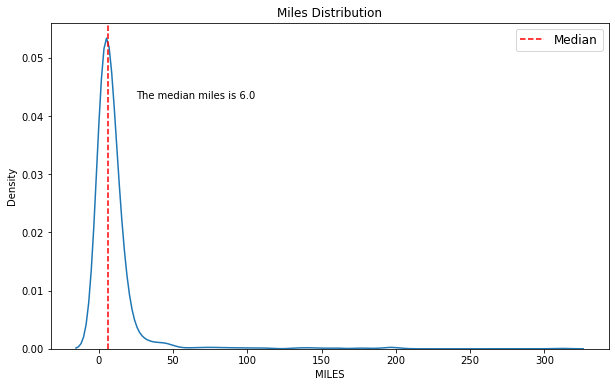

In [25]:
m_median=df['MILES'].median()
# Creating figure an
fig, ax = plt.subplots(figsize = (10,6))

#Plotting:
sns.kdeplot(data=df,x='MILES',ax=ax)

#Setting Title
ax.set_title('Miles Distribution')

#Setting Line
ax.axvline(m_median,linestyle='--',label='Median',color='red')
ax.annotate(f'The median miles is {m_median}',xy=(25,0.043))

#Showing Legend 
ax.legend(fontsize='large')
plt.show()

In [26]:
df['MILES'].describe()

count    1154.000000
mean       10.567418
std        21.588452
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES, dtype: float64

#### We can see that :
<font color='blue'> The minimun trip distance in our dataset is 0.5 miles.</font>
<font color='blue'> The maximum trip distance in our dataset is 310.30 miles </font>


# EDA

## Q1. How much Uber trips occurred during the timestamp in the dataset?

In [27]:
start_date= df['START_DATE'].min()
end_date= df['START_DATE'].max()
length=len(df)
print(f'The record starts from : ', start_date)
print(f'The record ends on : ',end_date)
print(f'No. of trips occurred during this time period : ', length)

The record starts from :  2016-01-01 21:11:00+00:00
The record ends on :  2016-12-31 22:08:00+00:00
No. of trips occurred during this time period :  1154


### Insights

The Number of Trips occurred is 1154 during 1st January 2016 to 31 December 2016 (1 year) 

## Q2. What is the median for daily and monthly total trips?

In [28]:
#Copying DataFrame..
median_trip=df.copy()

#Extracting Hour Day Month values
median_trip['Hour']= median_trip['START_DATE'].apply(lambda x:x.strftime('%H'))
median_trip['Month']= median_trip['START_DATE'].apply(lambda x:x.strftime('%b'))
median_trip['Date']= median_trip['START_DATE'].apply(lambda x:x.strftime('%Y-%m-%d'))

In [29]:
#Checking New Columns
median_trip.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Hour,Month,Date
0,2016-01-01 21:11:00+00:00,2016-01-01 21:17:00+00:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Jan,2016-01-01
1,2016-01-02 01:25:00+00:00,2016-01-02 01:37:00+00:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,01,Jan,2016-01-02


In [30]:
#Calculating Median For Monthly Total Trips.
m_month= median_trip.groupby('Month').size().median()
d_day=median_trip.groupby('Date').size().median()
print(f'The Monthly median is : ',m_month)
print(f'The Daily Median is : ',d_day)

The Monthly median is :  109.5
The Daily Median is :  3.5


### Insights:

There are approximately **110** bookings **Monthly** and **4** bookings **Daily**  in 2016. 

## Q3. How is the customer segment proportion?

Business    0.933276
Personal    0.066724
Name: CATEGORY, dtype: float64


Text(0.5, 1.0, 'Customer Segment Proportion :\n 1st Jan 2016 to 31st Dec 2016')

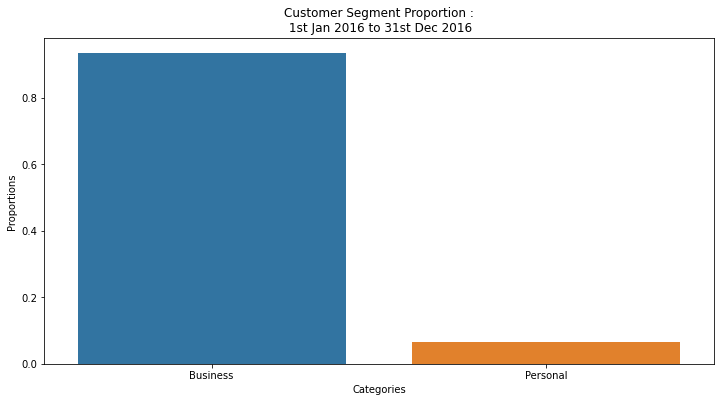

In [31]:
seg= df['CATEGORY'].value_counts(normalize= True)
print(seg)
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(ax=ax, x= seg.index, y= seg.values)
plt.xlabel('Categories')
plt.ylabel('Proportions')
plt.title('Customer Segment Proportion :\n 1st Jan 2016 to 31st Dec 2016')

Meeting            0.285276
Meal/Entertain     0.245399
Errand/Supplies    0.196319
Customer Visit     0.154908
Temporary Site     0.076687
Between Offices    0.027607
Moving             0.006135
Airport/Travel     0.004601
Charity ($)        0.001534
Commute            0.001534
Name: PURPOSE, dtype: float64


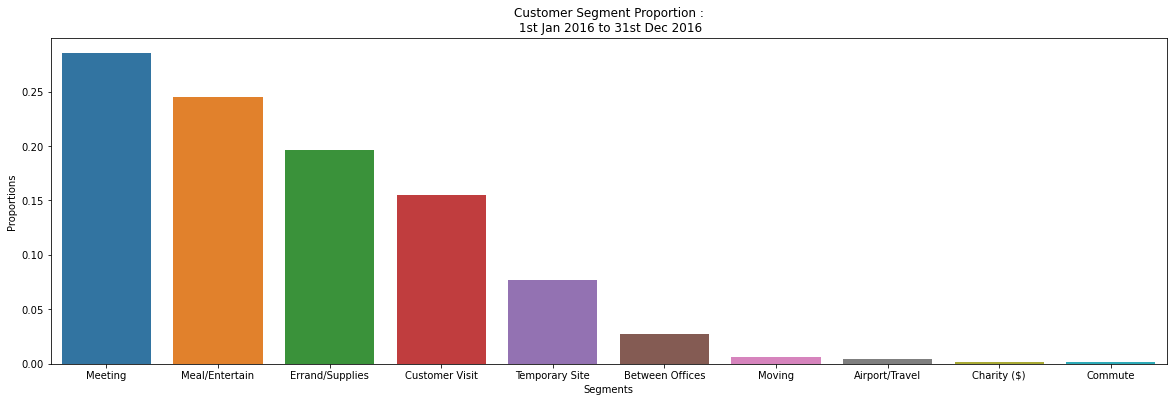

In [32]:
seg1= df['PURPOSE'].value_counts(normalize= True)
fig, ax = plt.subplots(figsize = (20,6))
sns.barplot(ax=ax, x= seg1.index, y= seg1.values)
plt.xlabel('Segments')
plt.ylabel('Proportions')
plt.title('Customer Segment Proportion :\n 1st Jan 2016 to 31st Dec 2016')
print(seg1)

### Insights:

~93% of the Customers are booking Uber for Business Purpose whereas ~7% for Personal use.
Among Business purpose : Meeting , Meal/Entertain and Errand/Supplies are the Top.

## Q4. How is the hourly-trend for Uber trips?

Text(0.5, 1.0, 'Hourly Trends for Uber Trips')

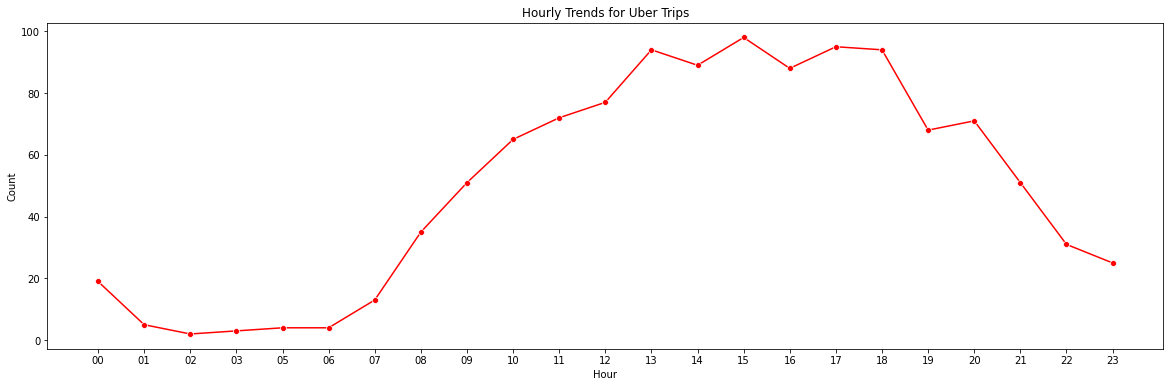

In [33]:
h_trip=median_trip.groupby('Hour').size().reset_index(name='Count')
fig, ax = plt.subplots(figsize = (20,6))
sns.lineplot(data=h_trip, x= 'Hour',y='Count',marker='.',markersize=12,color='red')
plt.title("Hourly Trends for Uber Trips")

### Insights:

1. The booking of Uber starts rising at 6 A.M
2. Peak Time is 3 P.M i.e,most number of Bookings
3. Apparenlty No bookings between 4 A.M to 5 A.M

## Q5. What is the probability of each segments ordering an Uber for each hour?

Text(0.5, 1.0, 'Segment Probability by Hour')

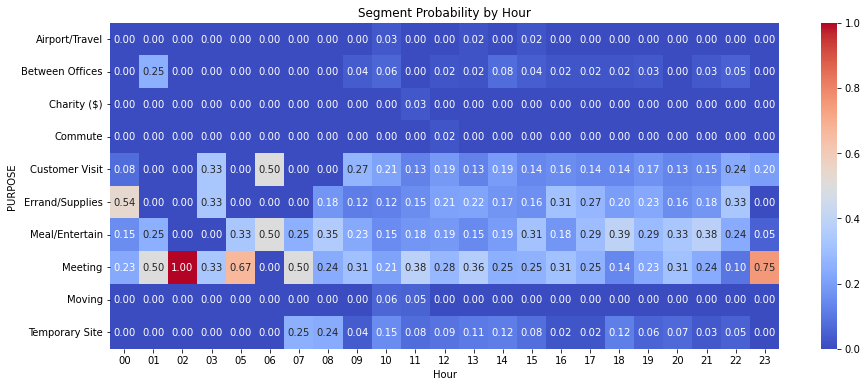

In [34]:
median_trip.groupby(['Hour','PURPOSE']).size().div(len(df)).reset_index(name='Probability')

plt.figure(figsize=(15,6))
contingency_table = pd.crosstab(median_trip['PURPOSE'],median_trip['Hour'], normalize='columns')
sns.heatmap(contingency_table,annot=True,cmap='coolwarm',fmt='.2f')

plt.title('Segment Probability by Hour')

### Insights : 

1. At 3am, the possibilities of a person ordering an Uber is for Meeting, Customer Visit, or Errand/Supplies.
2. At 5am, the possibily for someone ordering an uber is either for Meeting or for Meal/Entertain.

## Q6. What is the favorite pick-up spots for each segment?

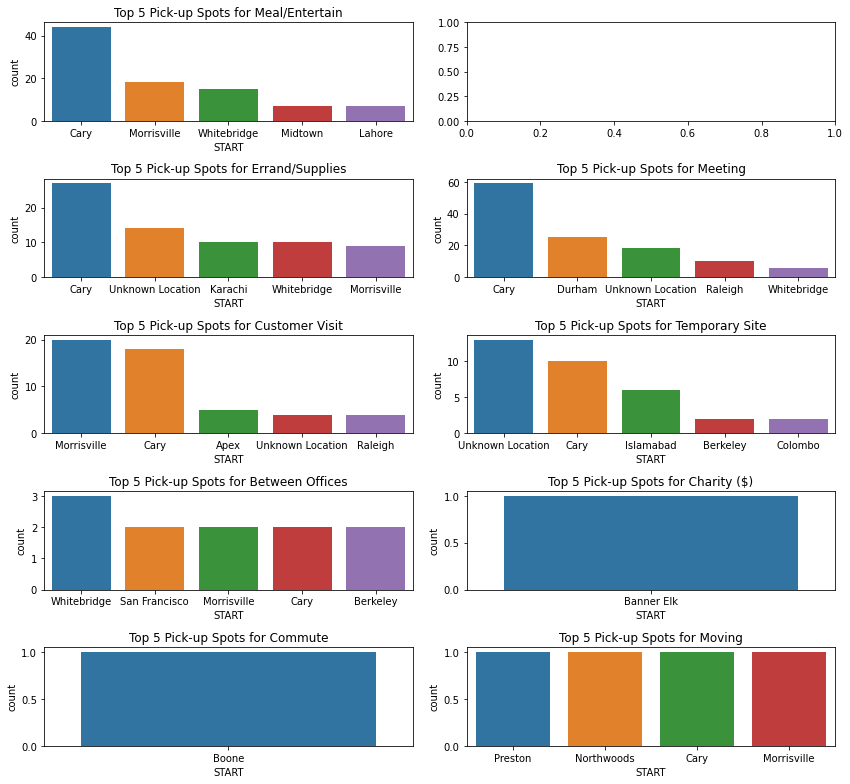

In [35]:
# Creating figure and axes object
fig, axs = plt.subplots(nrows = 5, ncols = 2, figsize = (12,11))

# Flatten the axs array
axs = axs.flatten()

# Extracting PURPOSE column categories
cat = df['PURPOSE'].unique()

# Zipping ax and categories
pair = tuple(zip(axs, cat))

# Plotting
for ax, cat in pair:
    if type(cat) == float:
        continue
    else:
        data = df.groupby(['PURPOSE', 'START']).size().reset_index(name='count').sort_values(by='count', ascending = False)
        sns.barplot(
            data = data.loc[data['PURPOSE'] == cat].head(5),
            x = 'START',
            y = 'count',
            ax = ax
        )
        ax.set_title(f'Top 5 Pick-up Spots for {cat}')
    
plt.tight_layout()
plt.show()

### Insights :

Now we can correlate this information with our insight before. For example:

1. At 5am, drivers can stand by at Carry, Durham, Morrisvile, or Whitebridge because the possibilities to get an order is great at that time and place. (Remember our insights on the previous question which state that, at 5am the orders possibilities only comes from customers who have Meeting purpose or Meal/Entrtain purpose.
2. This information also helps Uber and drivers understand the customers behaviors, specifically their location-ordering behavior.

## Q7. How is the daily-trend for Uber trips?

Text(0.5, 0, 'Day Name')

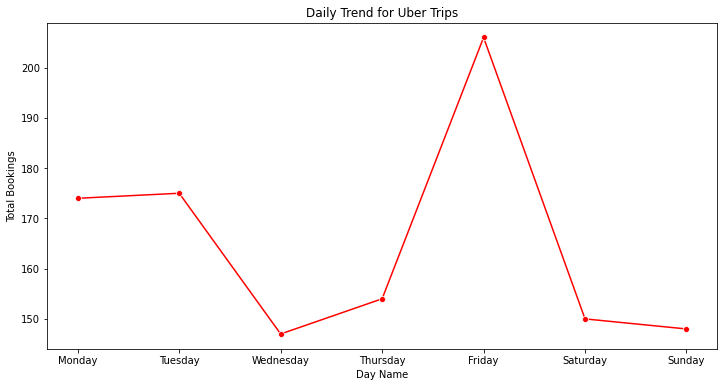

In [36]:
day_trend=df.copy()
day_trend['DAYNAME'] = day_trend['START_DATE'].apply(lambda x: x.strftime('%A'))
day_trend=day_trend.groupby('DAYNAME').size()

#Creating Day Order:
day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fig,ax=plt.subplots(figsize=(12,6))
sns.lineplot(x=day_trend.loc[day].index,y=day_trend.loc[day].values,ax=ax,marker='.',markersize=12,color='red')
plt.title("Daily Trend for Uber Trips")
plt.ylabel('Total Bookings')
plt.xlabel('Day Name')

### Insight :

Friday has the Most Number of bookings for Uber Trips.

## Q8. How is the monthly-trend for Uber trips?

Text(0, 0.5, 'COUNT')

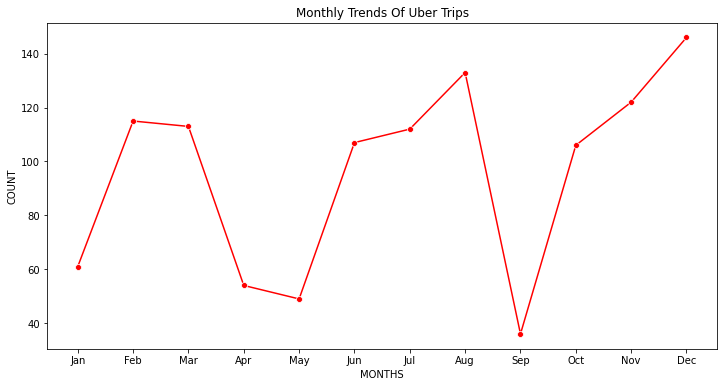

In [37]:
monthly_trip=median_trip.groupby('Month').size()

#Creating a Month Order:
Month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig,ax=plt.subplots(figsize=(12,6))
sns.lineplot(x=monthly_trip.loc[Month].index,y=monthly_trip.loc[Month].values,ax=ax,marker='.',markersize=12,color='red')
plt.title("Monthly Trends Of Uber Trips")
plt.xlabel('MONTHS')
plt.ylabel('COUNT')

### Insights :

1. Bookings decreased on the month of **September** but starts increasing there after.
2. Bookings was at its peak during the month of **December**.

## Q9. Is there any specific characteristic of each segment based on the travel distance?

Text(0.5, 0, 'MILES TRAVELLED')

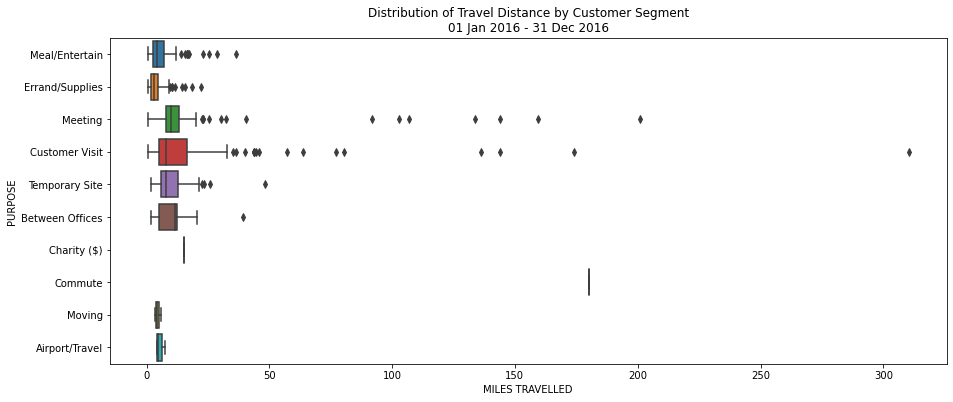

In [38]:
plt.figure(figsize=(15,6))
sns.boxplot(x='MILES',y='PURPOSE', data=df)
plt.title('Distribution of Travel Distance by Customer Segment\n01 Jan 2016 - 31 Dec 2016')
plt.xlabel('MILES TRAVELLED')

### Insights :

1. Customers who have Errand/Supplies purpose tend to have relatively low travel distance.
2. On median, customers who have Meeting purpose travels further than most of the other purposes.
3. Customers who have Customer Visit purpose have relatively high variability than the other purposes.

## Q10. Is there any specific characteristic of each segment based on the travel time?

Text(0.5, 1.0, 'Travel Time by Customer Segment Distribution\n01 Jan 2016 - 31 Dec 2016')

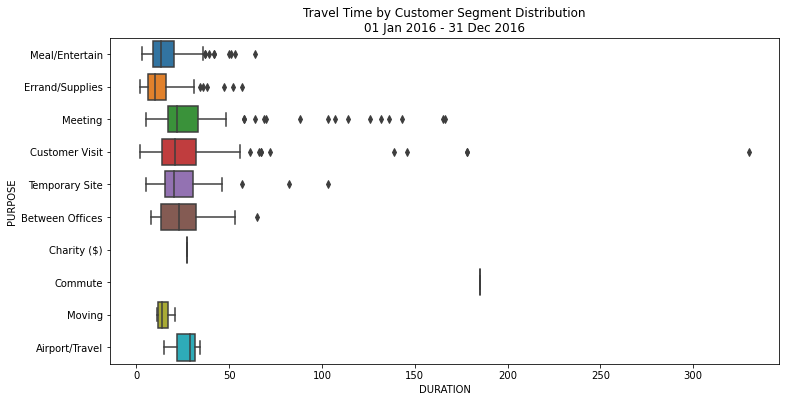

In [39]:
df['DURATION']=(df['END_DATE'] - df['START_DATE']).dt.total_seconds()/60
fig,ax= plt.subplots(figsize=(12,6))
sns.boxplot(x=df['DURATION'],y=df['PURPOSE'],ax=ax)
plt.title("Travel Time by Customer Segment Distribution\n01 Jan 2016 - 31 Dec 2016")

### Insight :

1. Customers with Meal/Entertain purpose have relatively low travel duration compared to other purposes in Business category.
2. On median, customers who have Meeting, Customer Visit, Temporary Site, and Between Offices purpose have similar travel duration.
3. Customers who have Customer Visit purpose have relatively high variability than the other purposes.